In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('developer_dataset.csv')
#print(df.head())

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/517313853.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [3]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [4]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


In [5]:
# percentage missing data from each column

maxRows = df['RespondentID'].count()
 
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [6]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

Text(0.5, 1.0, 'Missing DevType Data')

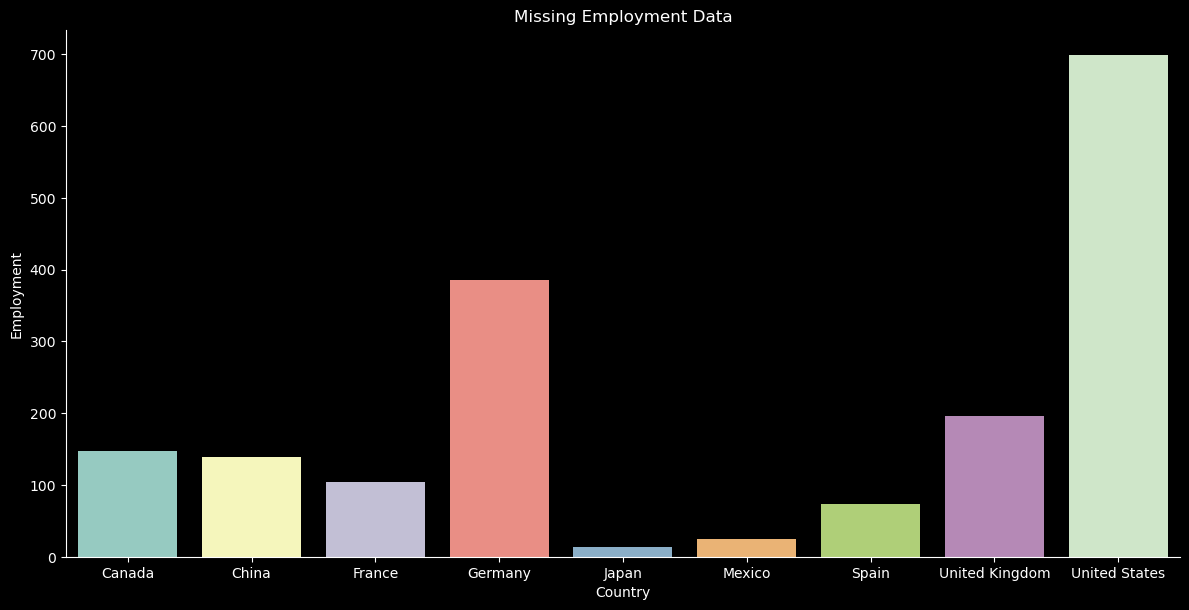

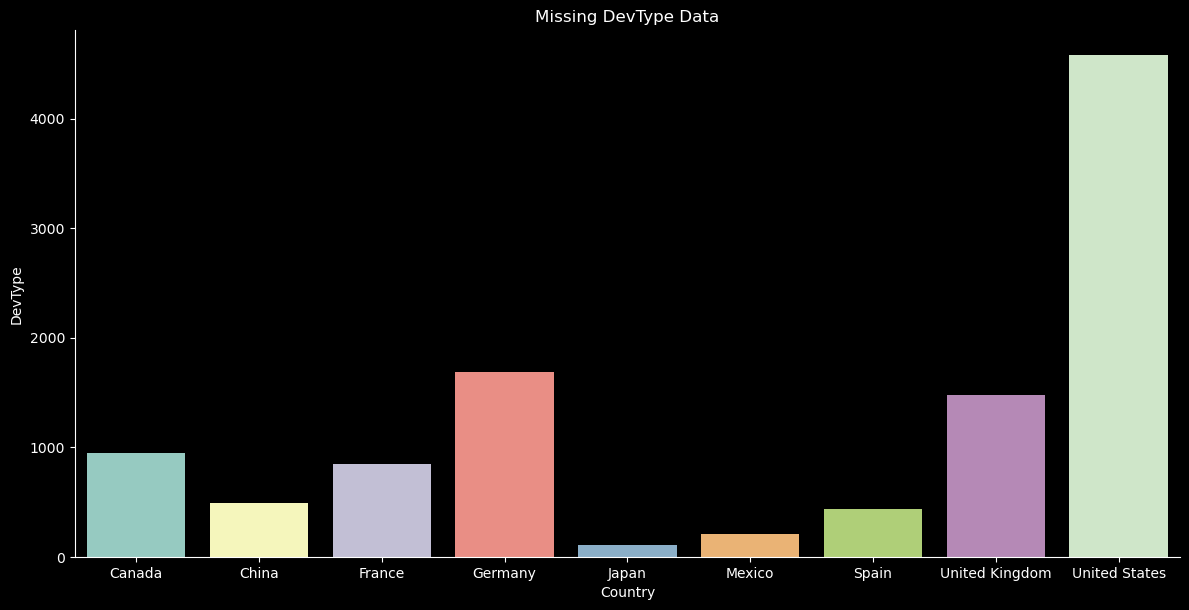

In [7]:
df[['RespondentID','Country']].groupby('Country').count()
 
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
 
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
plt.title('Missing Employment Data')
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)
plt.title('Missing DevType Data')

In [8]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/1029819065.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/1029819065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/1029819065.py:9: SettingWithCopyWarning: 
A val

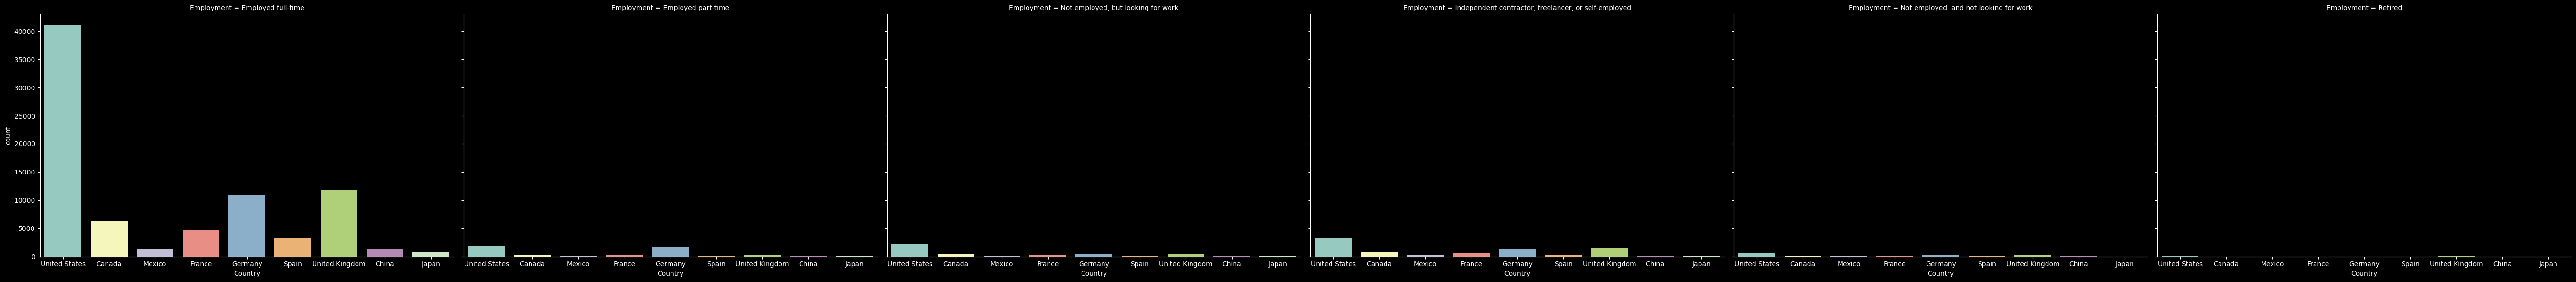

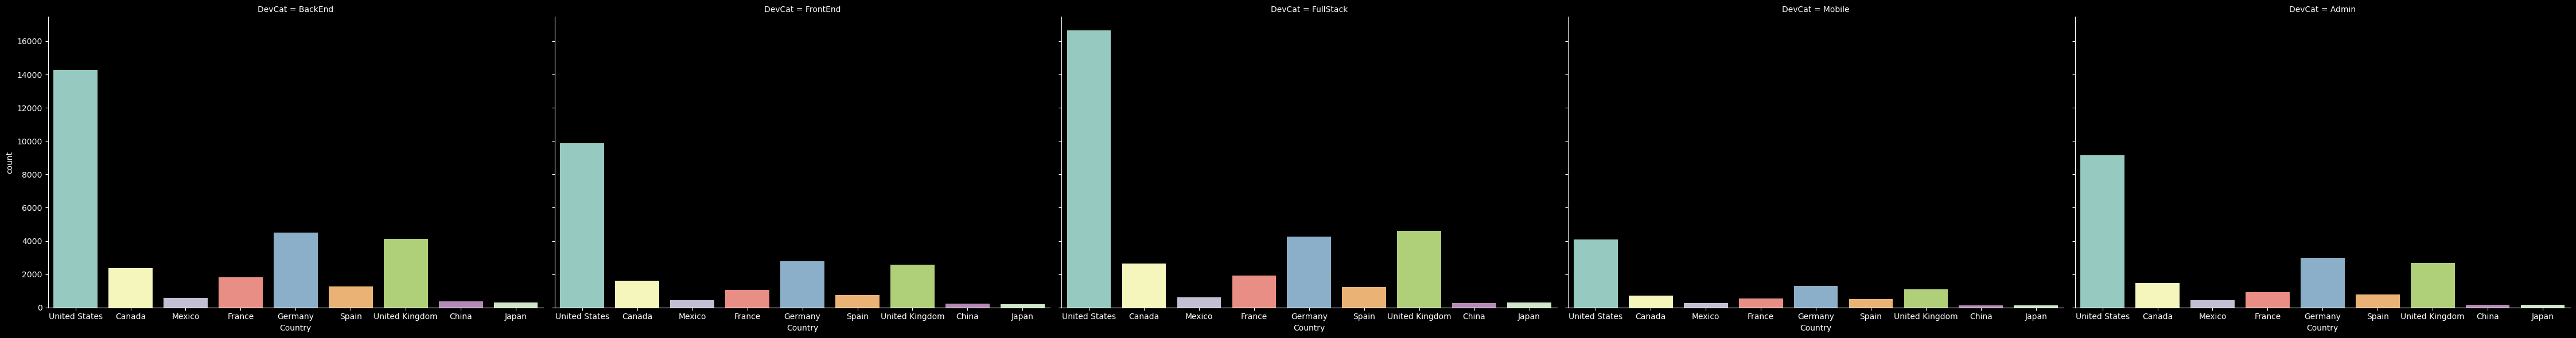

In [9]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
devdf.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

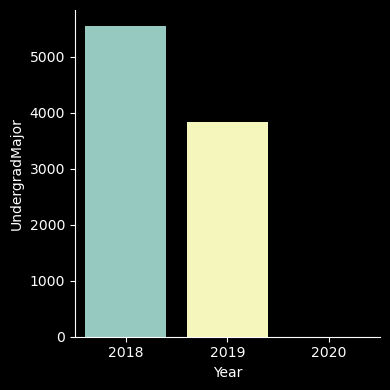

In [10]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

In [11]:
df = df.sort_values(['RespondentID','Year'])
 
df['UndergradMajor'].bfill(axis=0, inplace=True)

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/2318743366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/2318743366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/2318743366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

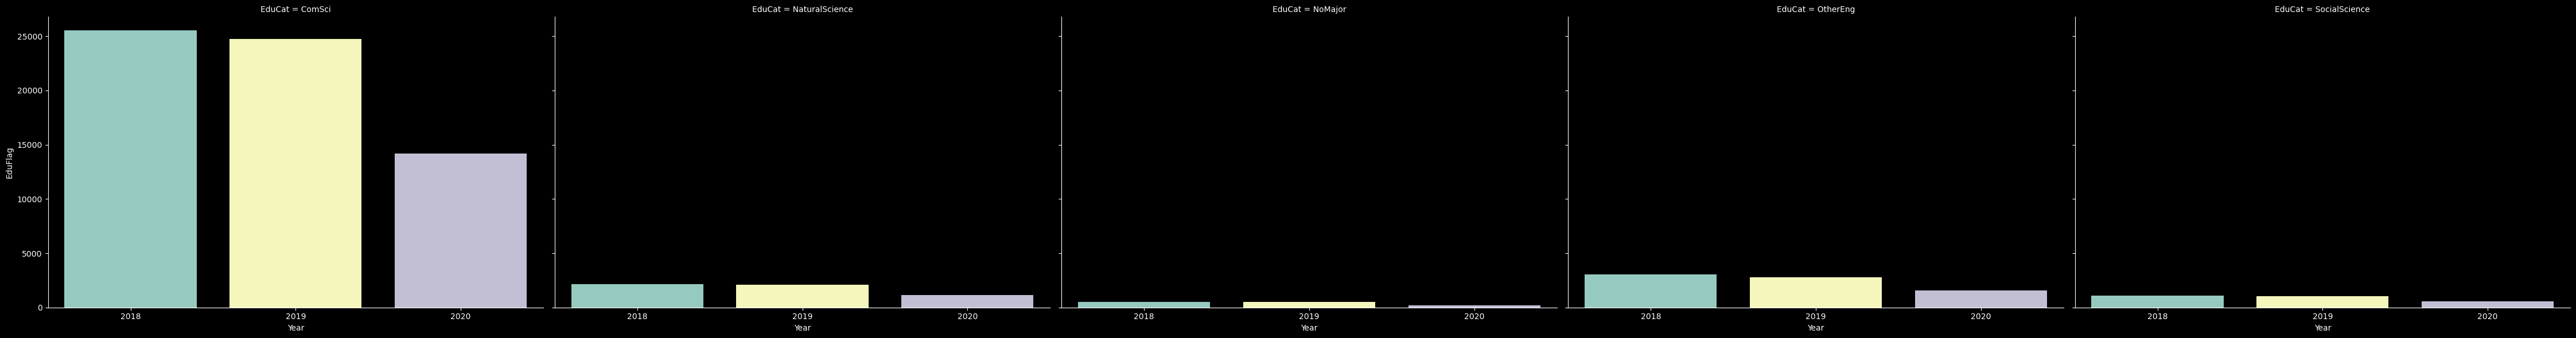

In [12]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

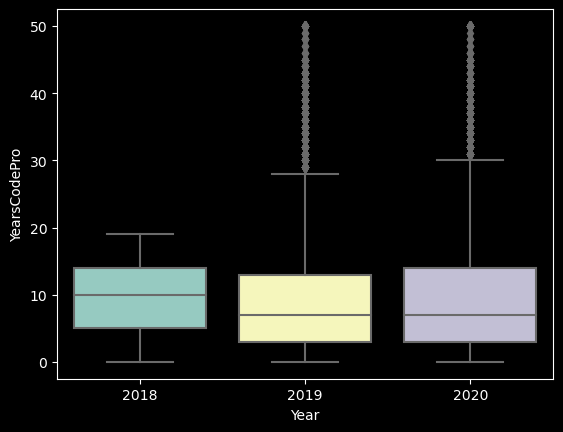

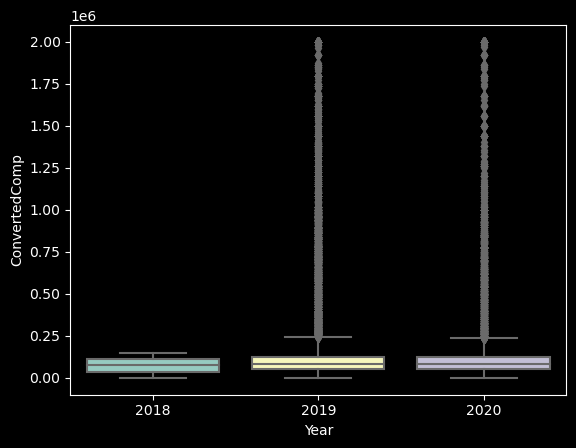

In [13]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
plt.show()
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)


In [14]:
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_76074/2851799836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

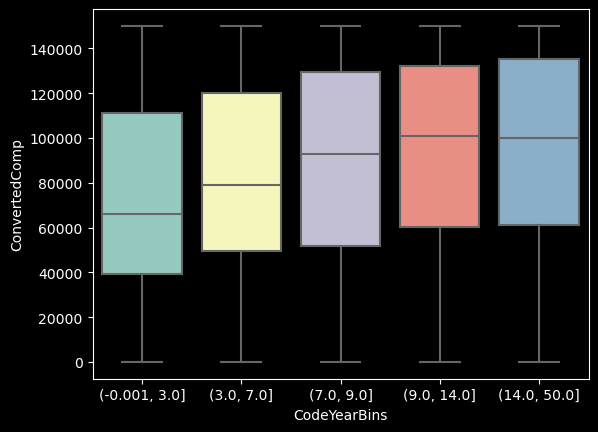

In [15]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)